# Data Cleaning with Pandas

This notebook features various data cleaning procedures required to run analysis on the database. Techniques include <br>
- removing duplicates
- removing incorrectable data formatting issues
- imputing missing data
- manipulating data for readability
- manipulating columns for utility
- .. 

## 1 Imports and loading tables

In [57]:
# Package imports
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

In [2]:
# Loading datasets from csv files
orders = pd.read_csv('./data_raw/orders.csv')
orderlines = pd.read_csv('./data_raw/orderlines.csv')
brands = pd.read_csv('./data_raw/brands.csv')
products = pd.read_csv('./data_raw/products.csv')

In [3]:
# Create copies so reimports are not required when messing up
orders_df = orders.copy()
orderlines_df = orderlines.copy()
brands_df = brands.copy()
products_df = products.copy()

## 2 Data exploration
Using `.info()` allows to find missing values, datatypes, columnnames at a glance

In [34]:
# Getting an overview of the datasets contents
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [18]:
orderlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [9]:
brands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [118]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


Tasks include checking missing values
- products_df `desc`, `price` and `type` columns
- orders_df `total_paid` column

Also includes fixing datatypes
- products_df `promo_price` and `price` columns are `str`
- orderlines_df `unit_price` and `date` columns are `str`; `id` and `product_id` need checking for redundancy
- orders_df `created_date` column is `str`

## 3 Data Cleaning
In this section we perform various steps of data cleaning required to achieve data integrity

### 3.1 Duplicates

In [ ]:
orders_df.duplicated().sum()

0

In [ ]:
orderlines_df.duplicated().sum()

0

In [119]:
products_df.duplicated().sum()

8746

In [64]:
# Checking manually before removal
products_df.loc[products_df.duplicated(), :].head(20)

,sku,name,desc,price,promo_price,in_stock,type
101,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
102,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
103,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
104,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
105,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
106,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
107,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
108,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
110,PAC0508,Apple MacBook Pro 133 '' 25GHz | 16GB RAM | 1T...,Apple MacBook Pro Fusion Drive 16GB 2 internal...,1919,16.999.895,0,1282
111,PAC0508,Apple MacBook Pro 133 '' 25GHz | 16GB RAM | 1T...,Apple MacBook Pro Fusion Drive 16GB 2 internal...,1919,16.999.895,0,1282


In [14]:
brands_df.duplicated().sum()

0

In [4]:
# Removing duplicates from products dataframe
products_df.drop_duplicates(inplace = True)

### 3.2 Converting datetime columns & removing redundancy

In [5]:
orders_df["created_date"] = pd.to_datetime(orders_df["created_date"])
orderlines_df["date"] = pd.to_datetime(orderlines_df["date"])

In [ ]:
# Checking the different id's
orderlines_df.head(10)

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
5,1119114,295310,0,10,WDT0249,231.79,2017-01-01 01:14:27
6,1119115,299544,0,1,APP1582,1.137.99,2017-01-01 01:17:21
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
9,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11


In [ ]:
orderlines_df['product_id'].value_counts()
# Product_id seems to be a deprecated column as all values are 0

product_id
0    293983
Name: count, dtype: int64

In [6]:
# Removing product_id column from orderlines_df
orderlines_df.drop(columns = 'product_id', inplace=True)

### 3.3 Handling missing values

In [ ]:
# Locate missing values in total_paid column
orders_df.loc[orders_df['total_paid'].isna(), :]

,order_id,created_date,total_paid,state
127701,427314,2017-11-20 18:54:39,NaN,Pending
132013,431655,2017-11-22 12:15:24,NaN,Pending
147316,447411,2017-11-27 10:32:37,NaN,Pending
148833,448966,2017-11-27 18:54:15,NaN,Pending
149434,449596,2017-11-27 21:52:08,NaN,Pending


In [7]:
# Drop rows with NaN in total_paid
orders_df = orders_df.dropna(subset = ['total_paid'])

In [121]:
# Locating missing values in desc column of products_df
products_df.loc[products_df['desc'].isna(), :]

,sku,name,desc,price,promo_price,in_stock,type
16126,WDT0211-A,"Open - Purple 2TB WD 35 ""PC Security Mac hard ...",NaN,107,814.659,0,1298
16128,APP1622-A,Open - Apple Smart Keyboard Pro Keyboard Folio...,NaN,1.568.206,1.568.206,0,1298
17843,PAC2334,Synology DS718 + NAS Server | 10GB RAM,NaN,566.35,5.659.896,0,12175397
18152,KAN0034-A,Open - Kanex USB-C Gigabit Ethernet Adapter Ma...,NaN,29.99,237.925,0,1298
18490,HTE0025,Hyper Pearl 1600mAh battery Mini USB Mirror an...,NaN,24.99,22.99,1,1515
18612,OTT0200,OtterBox External Battery Power Pack 20000 mAHr,NaN,79.99,56.99,1,1515
18690,HOW0001-A,Open - Honeywell thermostat Lyric zonificador ...,NaN,199.99,1.441.174,0,11905404


In [49]:
# Comparing the contents of description column and name column manually by looking at random entries
products_df[['name', 'desc']].sample(10)

,name,desc
2210,Philips Hue Go Portable Light White,Portable light with natural dynamic effects an...
4979,Mujjo Leather Wallet Case Black Leather iPhone 7,ultrathin cover with card case and material ve...
6516,Headset calls iPhone 5s repair,Repair service including parts and labor for i...
9687,OWC ThuderBay RAID Thunderbolt 4 3 | 40TB (4x1...,RAID Disk external box 25 inch and 35 inch two...
2869,"Acme Skinny Sleeve Case MacBook Pro 15 ""Black ...",Neoprene Sleeve for MacBook Pro 15-inch.
7277,"Apple iMac 27 ""Core i5 3.8GHz Retina 5K | 64GB...",IMac desktop computer 27 inch Retina 5K RAM 64...
7742,Like new - Apple Watch Nike + 42mm Aluminum Ca...,Apple Watch 42 mm refitted with double waterpr...
4206,Wowewa Protector Tempered Glass iPhone 6 / 6S ...,3D tempered glass protector: covers all edges ...
3374,D-Link DCS-800L camera Wi-Fi Baby Monitor EyeO...,Portable wireless camera with motion detector ...
7385,Apple iPhone Silicone Case Cover 8 Plus / 7 Pl...,Ultrathin silicone case and microfiber premium...


In [8]:
# High correlation between name and desc columns, so we can copy name to desc for the missing values
products_df.loc[products_df['desc'].isna(), 'desc'] = products_df.loc[products_df['desc'].isna(), 'name']

In [123]:
# Locating missing values in price column of products_df
products_df.loc[products_df['price'].isna(), :]

,sku,name,desc,price,promo_price,in_stock,type
34,TWS0019,Twelve South MagicWand support Apple Magic Tra...,MagicWand for wireless keyboard and Magic Trac...,NaN,299.899,0,8696
1900,AII0008,Aiino Case MacBook Air 11 '' Transparent,MacBook Air 11-inch casing with matte finish.,NaN,22.99,0,13835403
2039,CEL0020,Celly Ambo Luxury Leather Case + iPhone 6 Case...,Cover and housing together with magnet for iPh...,NaN,399.905,0,11865403
2042,CEL0007,Celly Wallet Case with removable cover Black i...,Case Book for iPhone 6 card case type.,NaN,128.998,0,11865403
2043,CEL0012,Celly Silicone Hard Shell iPhone 6 Blue,Hard Shell Silicone iPhone 6.,NaN,4.99,0,11865403
2044,CEL0014,Celly Silicone Hard Shell iPhone 6 Amarillo,Hard Shell Silicone iPhone 6.,NaN,59.895,0,11865403
2049,CEL0015,Celly fur-lined Powerbank battery 4000mAh Black,Leather-wrapped External Battery 4000mAh for i...,NaN,239.895,0,1515
2051,CEL0018,Celly Wallet Leather Case cover Black iPhone 6,Card case with transparent protective cover fo...,NaN,294.877,0,11865403
2052,CEL0023,Celly Ambo Luxury Leather Case + Case Gold iPh...,Cover and housing together with magnet for iPh...,NaN,329.894,0,11865403
2053,CEL0025,Celly Ambo Luxury Leather Case + Case iPhone 6...,Cover and housing together with magnet for iPh...,NaN,449.878,0,11865403


In [9]:
# Removing missing price value entries
products_df = products_df.dropna(subset=['price'])

In [ ]:
# Locating missing values in type column of products_df
products_df.loc[products_df['type'].isna(), :]

In [10]:
# Removing missing type value entries (important for categorization)
products_df = products_df.dropna(subset=['type'])

### 3.4 Investigating and handling corrupt price values

In [51]:
orderlines_df['unit_price'].value_counts()
# unit prices are inconsistent by having more than one dot for decimal places, 

unit_price
19.99     8132
130.00    5150
69.99     5147
29.99     5145
64.99     4633
          ... 
500.00       1
67.65        1
377.03       1
558.59       1
48.68        1
Name: count, Length: 11329, dtype: int64

In [52]:
# Count the number of decimal points in the unit_price
orderlines_df['unit_price'].str.count(r"\.").value_counts()

unit_price
1    257814
2     36169
Name: count, dtype: int64

In [11]:
# Handling inconsistencies
# Boolean mask to find the orders that contain a price with multiple decimal points
multiple_decimal_mask = orderlines_df['unit_price'].str.count(r'\.') > 1

# Apply the boolean mask to the orderlines DataFrame. to see what unit prices are caught
# orderlines_df.loc[multiple_decimal_mask, "unit_price"]

# Remove the rows with corrupted order_ids from the orderlines_df
orderlines_df = orderlines_df.loc[~multiple_decimal_mask, :]

# Convert to float data type
orderlines_df["unit_price"] = pd.to_numeric(orderlines_df["unit_price"])

In [127]:
products_df['price'].str.count(r"\.").value_counts()

price
1    6936
0    3174
2     374
Name: count, dtype: int64

In [12]:
# Boolean mask to select indexes of prices that contain multiple decimal points
multiple_decimal_mask = products_df['price'].str.count(r'\.') > 1

# Apply the boolean mask to the prices DataFrame to see which prizes are caught
# products_df.loc[multiple_decimal_mask, "price"]

# Apply the boolean mask to the DataFrame. This way we can remove multiple occurrences of prizes
products_df = products_df.loc[~multiple_decimal_mask, :]

In [133]:
# Apart from that price and promo_price columns have entries ending on three numbers after a dot
price_problems_number = products_df.loc[products_df.price.astype(str).str.contains(r"\d+\.\d{3,}"), :].shape[0]
price_problems_number

164

In [132]:
print(f"The column price has in total {price_problems_number} wrong values. This is {round(((price_problems_number / products_df.shape[0]) * 100), 2)}% of the rows of the DataFrame")

The column price has in total 164 wrong values. This is 1.62% of the rows of the DataFrame


In [ ]:
# Therefore we will remove entries having those properties
three_decimal_mask = products_df['price'].str.contains(r"\d+\.\d{3,}")

# Apply the boolean mask to the DataFrame
products_df = products_df.loc[~three_decimal_mask, :]

# Convert price to numeric data type
products_df["price"] = pd.to_numeric(products_df["price"])

In [139]:
# Checking on percentage of corrupted promo_price entries
promo_price_problems_number = products_df.loc[products_df.promo_price.astype(str).str.contains(r"\d+\.\d{3,}"), :].shape[0]
print(f"The column price has in total {promo_price_problems_number} wrong values. This is {round(((promo_price_problems_number / products_df.shape[0]) * 100), 2)}% of the rows of the DataFrame")

The column price has in total 9188 wrong values. This is 92.38% of the rows of the DataFrame


In [15]:
# Drop promo_price column as it is unusable at 92% corruption rate
products_df.drop(columns='promo_price', inplace=True)

In [141]:
# Checking for Primary Key property of 'sku' column in products_df by comparing size
products_df['sku'].nunique() == products_df.shape[0]

True

In [16]:
# Renaming a column for consistency of naming patterns
orderlines_df = orderlines_df.rename(columns = {'id_order': 'order_id'})

In [ ]:
# Extend the products_df with the manufacturer handle consisting of the first letters of the sku column to later join brands_df
products_df['man'] = products_df['sku'].str[:3]

In [ ]:
# Overview of the remainder of the products dataframe - at first glance no glaring technical issues remain
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9946 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9946 non-null   object 
 1   name      9946 non-null   object 
 2   desc      9946 non-null   object 
 3   price     9946 non-null   float64
 4   in_stock  9946 non-null   int64  
 5   type      9946 non-null   object 
 6   man       9946 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 621.6+ KB


### 3.5 Further cleaning within more complex relationships of dataset
- limiting orders to completed ones
- keeping only order_id's not filtered
- handling orders that include discarded products

In [18]:
# Checking order statuses
orders_df.state.value_counts()

state
Shopping Basket    117809
Completed           46605
Place Order         40883
Pending             14374
Cancelled            7233
Name: count, dtype: int64

In [19]:
# Only keep completed orders for this analysis
orders_df = orders_df.loc[orders_df['state'] == 'Completed', :]

In [24]:
# Compare the number of unique order_id's in orders and orderlines
print(f'In orders we can find {orders_df.order_id.nunique()} unique order ids, in orderlines we can find {orderlines_df.order_id.nunique()} unique order ids.')

In orders we can find 46605 unique order ids, in orderlines we can find 186822 unique order ids.


In [28]:
# Perform inner join on orders and orderlines to get a combined DataFrame
orders_orderlines = orders_df.merge(orderlines_df, how="inner", on="order_id")

# order_ids that are in both tables
order_ids = orders_orderlines["order_id"].unique()

# keep those ids in orders
orders_df = orders_df.loc[orders_df["order_id"].isin(order_ids), :]

# keep those ids in orderlines
orderlines_df = orderlines_df.loc[orderlines_df["order_id"].isin(order_ids), :]

In [ ]:
# Checking for same number of unique order_ids in both DataFrames after filtering
orders_df["order_id"].nunique() == orderlines_df["order_id"].nunique()

True

In [36]:
# Check for completeness of products in the orderlines
orderlines_products = orderlines_df.merge(products_df, how="left", on = "sku")[["order_id","sku","name" ]]

In [37]:
orderlines_products.name.isna().value_counts()

name
False    57034
True      1508
Name: count, dtype: int64

In [38]:
orderlines_products.loc[orderlines_products.name.isna(), :].head(10)

,order_id,sku,name
25,299638,SYN0127,NaN
43,299706,EVU0007,NaN
46,299712,APP0608,NaN
75,299860,PAC1516,NaN
83,299881,SAN0137,NaN
87,299902,IOT0018,NaN
97,299947,APP1482,NaN
116,300029,SYN0127,NaN
182,300251,APP0608,NaN
197,300283,PAC1400,NaN


In [ ]:
# Create a list of order_ids that have no product name associated with them
orders_to_delete = orderlines_products.loc[orderlines_products.name.isna(), "order_id"].unique()
orders_to_delete

array([299638, 299706, 299712, ..., 526106, 526122, 526363], dtype=int64)

In [40]:
# Remove entries from orders and orderlines Dataframes
orders_df = orders_df.loc[~orders_df.order_id.isin(orders_to_delete),:]
orderlines_df = orderlines_df.loc[~orderlines_df.order_id.isin(orders_to_delete),:]

In [ ]:
# Check the amount of unique order ids still present
orders_df["order_id"].nunique(), orderlines_df["order_id"].nunique()

(42636, 42636)

In [44]:
orders_df

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226549,527042,2018-03-14 11:47:50,18.98,Completed
226577,527070,2018-03-14 11:50:48,24.97,Completed
226581,527074,2018-03-14 11:51:42,24.97,Completed
226603,527096,2018-03-14 11:58:40,34.96,Completed


In [45]:
orderlines_df

,id,order_id,product_quantity,sku,unit_price,date
7,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16
8,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34
9,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11
18,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14
24,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50
...,...,...,...,...,...,...
293599,1649474,525664,1,TUC0207,16.52,2018-03-14 11:45:05
293616,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01
293621,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36
293644,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35


## 3.6 Calculating and Filtering by Discounts
This chapter compares prices and discounts for inconsistencies and performs filtering operations

In [47]:
products_df.head(5)

,sku,name,desc,price,in_stock,type,man
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,RAI
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,APP
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,APP
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,APP
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,KIN


In [48]:
# Rename price into listed_price for clarity
products_df.rename(columns={'price': 'listed_price'}, inplace=True)

In [49]:
# Create Dataframe to by merging orderlines and products
ol_prod_discount_df = orderlines_df.merge(products_df, how="left", on = "sku")[["order_id", "sku", "unit_price", "listed_price"]]

In [50]:
ol_prod_discount_df

,order_id,sku,unit_price,listed_price
0,299545,OWC0100,47.49,60.99
1,299546,IOT0014,18.99,22.95
2,295347,APP0700,72.19,89.00
3,299556,CRU0039-A,60.90,76.99
4,299561,PEB0015,142.49,299.99
...,...,...,...,...
55952,525664,TUC0207,16.52,24.99
55953,527070,APP0698,9.99,25.00
55954,527074,APP0698,9.99,25.00
55955,527096,APP0698,9.99,25.00


In [53]:
# calculate discount raw and percentage
ol_prod_discount_df["discount_pct"] = round((1 - ol_prod_discount_df["unit_price"] / ol_prod_discount_df["listed_price"]) * 100, 2)
ol_prod_discount_df["discount_raw"] = round(ol_prod_discount_df["listed_price"] - ol_prod_discount_df["unit_price"], 2)
ol_prod_discount_df

,order_id,sku,unit_price,listed_price,discount_pct,discount_raw
0,299545,OWC0100,47.49,60.99,22.13,13.50
1,299546,IOT0014,18.99,22.95,17.25,3.96
2,295347,APP0700,72.19,89.00,18.89,16.81
3,299556,CRU0039-A,60.90,76.99,20.90,16.09
4,299561,PEB0015,142.49,299.99,52.50,157.50
...,...,...,...,...,...,...
55952,525664,TUC0207,16.52,24.99,33.89,8.47
55953,527070,APP0698,9.99,25.00,60.04,15.01
55954,527074,APP0698,9.99,25.00,60.04,15.01
55955,527096,APP0698,9.99,25.00,60.04,15.01


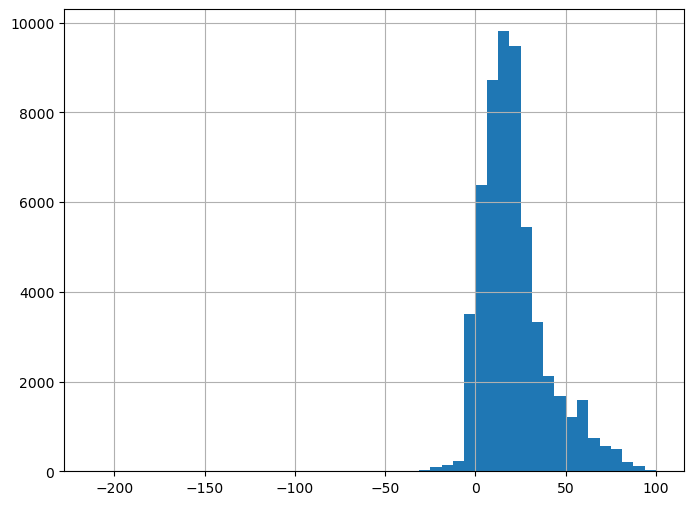

In [ ]:
# Explore the discount percentages
ol_prod_discount_df.discount_pct.hist(bins= 50, figsize=(8,6));

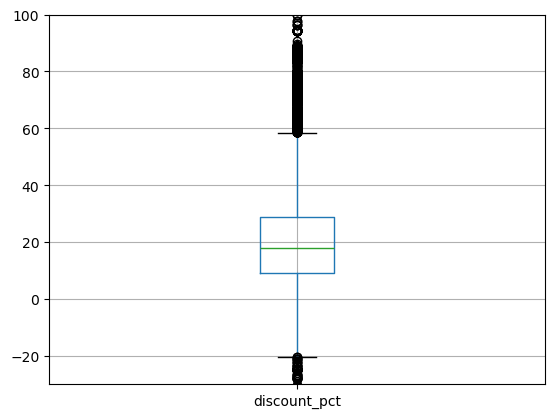

In [58]:
# Boxplot
ax2 = ol_prod_discount_df.boxplot("discount_pct");
ax2.set_ylim(-30, +100)
plt.show()

In [ ]:
# Negative percentages are suspect and could indicate corrupted data
# Filtering out using 1.5 * IQR not possible on the low side since that would remove those only partially.
# Check small differences
ol_prod_discount_df.loc[ol_prod_discount_df['discount_pct'] < 0, :].sort_values(by='discount_pct', ascending=False)

,order_id,sku,unit_price,listed_price,discount_pct,discount_raw
11316,352922,QNA0167,119.00,118.99,-0.01,-0.01
983,302922,KIN0153-2,149.99,149.98,-0.01,-0.01
1574,305172,BNQ0044,105.00,104.99,-0.01,-0.01
638,301544,KIN0153-2,149.99,149.98,-0.01,-0.01
895,302458,KIN0153-2,149.99,149.98,-0.01,-0.01
...,...,...,...,...,...,...
7758,324159,KIN0149-2,170.99,105.98,-61.34,-65.01
18683,382838,PRY0008,135.99,74.99,-81.34,-61.00
10268,347233,IFX0074,24.95,7.99,-212.27,-16.96
20333,388586,IFX0074,24.95,7.99,-212.27,-16.96


In [ ]:
# Remove all the negative discount percentages below -1% since small errors can occur via rounding and we want to preserve as much data as possible
ol_prod_discount_df = ol_prod_discount_df.loc[ol_prod_discount_df['discount_pct'] > -1, :]

In [65]:
ol_prod_discount_df.sort_values(by='discount_pct', ascending=True)

,order_id,sku,unit_price,listed_price,discount_pct,discount_raw
83,299909,LAC0159,176.69,174.99,-0.97,-1.70
30157,426543,SAN0148,31.28,30.99,-0.94,-0.29
20037,387492,SAN0148,31.28,30.99,-0.94,-0.29
4842,314649,SAM0073,109.00,107.99,-0.94,-1.01
4676,314166,SAM0073,109.00,107.99,-0.94,-1.01
...,...,...,...,...,...,...
52631,512862,MOP0109,2.00,69.95,97.14,67.95
52453,512451,MOP0107,1.60,69.95,97.71,68.35
52472,512498,MOP0107,1.60,69.95,97.71,68.35
12600,358440,SEV0018,0.01,19.99,99.95,19.98


In [66]:
# Check for inconsistencies in order payments and the nominal prices
orderlines_df2 = orderlines_df.copy()
orderlines_df2["unit_price_total"] = orderlines_df2["product_quantity"] * orderlines_df2["unit_price"]
orderlines_df2

,id,order_id,product_quantity,sku,unit_price,date,unit_price_total
7,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49
8,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99
9,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19
18,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90
24,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49
...,...,...,...,...,...,...,...
293599,1649474,525664,1,TUC0207,16.52,2018-03-14 11:45:05,16.52
293616,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98
293621,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98
293644,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97


In [67]:
# Group by order_id and sum the unit_price_total
orderlines_order_ids = orderlines_df2.groupby("order_id", as_index=False)["unit_price_total"].sum()

In [68]:
# Merge orders with the summed orderlines for comparison
diff_df = orders_df.merge(orderlines_order_ids, on="order_id")
diff_df

,order_id,created_date,total_paid,state,unit_price_total
0,241423,2017-11-06 13:10:02,136.15,Completed,129.16
1,242832,2017-12-31 17:40:03,15.76,Completed,10.77
2,243330,2017-02-16 10:59:38,84.98,Completed,77.99
3,245275,2017-06-28 11:35:37,149.00,Completed,149.00
4,245595,2017-01-21 12:52:47,112.97,Completed,105.98
...,...,...,...,...,...
42631,527042,2018-03-14 11:47:50,18.98,Completed,13.99
42632,527070,2018-03-14 11:50:48,24.97,Completed,19.98
42633,527074,2018-03-14 11:51:42,24.97,Completed,19.98
42634,527096,2018-03-14 11:58:40,34.96,Completed,29.97


In [69]:
# Calculate the difference between total_paid and unit_price_total
diff_df["difference"] = diff_df["total_paid"] - diff_df["unit_price_total"]

In [71]:
# Check for the range of differences. Total paid should be equal or larger than the sum of unit prices to account for shipping and processing fees. Negative values indicate a problem as well as very large positive values.
diff_df.difference.describe()

count   42636.00
mean       51.92
std       351.84
min      -165.00
25%         0.00
50%         4.99
75%         6.99
max      9065.96
Name: difference, dtype: float64

In [72]:
# calculate the quartiles
Q1 = diff_df["difference"].quantile(0.25)
Q3 = diff_df["difference"].quantile(0.75)

Q1, Q3

(0.0, 6.989999999999995)

In [ ]:
# calculate the interquartile range
IQR = Q3-Q1

# boundaries for outliers
(Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR)

(-10.484999999999992, 17.474999999999987)

In [74]:
# filter the DataFrame to include only "non-outliers"
diff_no_outliers_df = diff_df.loc[
    (diff_df["difference"] >= (Q1 - 1.5*IQR))
    &
    (diff_df["difference"] <= (Q3 + 1.5*IQR))
    ,
    :]

In [ ]:
# Remove outliers from the original DataFrames
orders_df = orders_df.loc[orders_df["order_id"].isin(diff_no_outliers_df['order_id']), :]
orderlines_df = orderlines_df.loc[orderlines_df["order_id"].isin(diff_no_outliers_df['order_id']), :]

In [ ]:
# Check for sample size remaining and fitting size
orders_df["order_id"].nunique(), orderlines_df["order_id"].nunique()

(40974, 40974)

In [77]:
# Join orderlines with the dataframe containing the discounts to include them in the final dataframe. Inner join to keep only those that have survived both filtering steps
orderlines_clean = orderlines_df.merge(ol_prod_discount_df, how="inner", on=["order_id", "sku"])
orderlines_clean.head(5)

,id,order_id,product_quantity,sku,unit_price_x,date,unit_price_y,listed_price,discount_pct,discount_raw
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,60.99,22.13,13.50
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,22.95,17.25,3.96
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,89.00,18.89,16.81
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,76.99,20.90,16.09
4,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,299.99,52.50,157.50


In [78]:
# Rename product_quantity to qty for usability
orderlines_clean.rename(columns={'product_quantity': 'qty'}, inplace=True)

In [79]:
# unit_price is doubled, so we will keep only one and rename it
orderlines_clean.rename(columns={'unit_price_x': 'unit_price'}, inplace=True)
orderlines_clean.drop(columns='unit_price_y', inplace=True)
orderlines_clean.head(5)

,id,order_id,qty,sku,unit_price,date,listed_price,discount_pct,discount_raw
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,60.99,22.13,13.50
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,22.95,17.25,3.96
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,89.00,18.89,16.81
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,76.99,20.90,16.09
4,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,299.99,52.50,157.50


In [80]:
# Add manufacturerer handle to the orderlines_clean DataFrame
orderlines_clean['man'] = orderlines_clean['sku'].str[:3]

## 3.7 Filtering Products

In [81]:
products_df.head(5)

,sku,name,desc,listed_price,in_stock,type,man
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,RAI
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,APP
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,APP
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,APP
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,KIN


In [82]:
products_df.nunique()

sku             9946
name            9791
desc            6744
listed_price    2327
in_stock           2
type             125
man              243
dtype: int64

In [83]:
orderlines_clean.nunique()

id              52474
order_id        40482
qty                27
sku              5061
unit_price       4264
date            52097
listed_price     1020
discount_pct     4060
discount_raw     3970
man               195
dtype: int64

In [84]:
# There is a disparity between the number of unique products (sku) in the products_df and orderlines_clean DataFrame.
# Keep only those products in products_df that are also in orderlines_clean
products_df = products_df.loc[products_df['sku'].isin(orderlines_clean['sku']), :]
products_df.nunique()

sku             5061
name            5021
desc            3752
listed_price    1020
in_stock           2
type             114
man              195
dtype: int64

## 4 Exports

In [86]:
# Save the cleaned DataFrames to csv files
# Brands DataFrame didnt get changed
orderlines_clean.to_csv("data_clean/orderlines_cl.csv", index=False)
products_df.to_csv("data_clean/products_cl.csv", index=False)
orders_df.to_csv("data_clean/orders_cl.csv", index=False)